In [26]:
import itertools
import pandas as pd
import numpy as np

from aeon.datasets.tsc_datasets import multivariate

In [27]:
df = pd.read_csv("../../results/results_25-06.csv")
df_properties = pd.read_csv("../../metadata/datasets_properties.csv")

In [28]:
reps = ['RP', 'MTF', 'GASF', 'GADF', 'FIRTS', 'CWT']
operations = ["sum", "subtraction", "dot_product", "element_wise"]
convolution_algorithm = [np.nan, "MiniRocket", "Rocket"]

# Resultados

In [29]:
df

,dataset,representation,operation,accuracy,convolution_algorithm,classification_algorithm
0,ArticularyWordRecognition,RP,sum,0.603333,NaN,Ridge
1,ArticularyWordRecognition,RP,sum,0.713333,Rocket,Ridge
2,ArticularyWordRecognition,RP,sum,0.363333,MiniRocket,Ridge
3,ArticularyWordRecognition,RP,subtraction,0.313333,NaN,Ridge
4,ArticularyWordRecognition,RP,subtraction,0.410000,Rocket,Ridge
...,...,...,...,...,...,...
1974,PEMS-SF,CWT,sum,0.901734,Rocket,Ridge
1975,PEMS-SF,CWT,sum,0.855491,MiniRocket,Ridge
1976,PEMS-SF,CWT,subtraction,0.635838,NaN,Ridge
1977,PEMS-SF,CWT,subtraction,0.780347,Rocket,Ridge


## Resultados faltantes

In [30]:
permutations = list(
    itertools.product(
        multivariate,
        reps,
        operations,
        convolution_algorithm
    )
)

df_permutation = pd.DataFrame(
    permutations,
    columns=["dataset", "representation", "operation", "convolution_algorithm"]
)

df_diff = df_permutation.merge(
    df[["dataset", "representation", "operation", "convolution_algorithm"]], 
    how='outer', 
    indicator=True
).query('_merge == "left_only"').drop('_merge', axis=1)

df_diff

,dataset,representation,operation,convolution_algorithm
365,DuckDuckGeese,CWT,dot_product,MiniRocket
366,DuckDuckGeese,CWT,dot_product,Rocket
367,DuckDuckGeese,CWT,dot_product,NaN
377,DuckDuckGeese,FIRTS,dot_product,MiniRocket
378,DuckDuckGeese,FIRTS,dot_product,Rocket
...,...,...,...,...
1818,PhonemeSpectra,RP,subtraction,Rocket
1819,PhonemeSpectra,RP,subtraction,NaN
1820,PhonemeSpectra,RP,sum,MiniRocket
1821,PhonemeSpectra,RP,sum,Rocket


In [31]:
for x in df_diff["dataset"].unique():
    print(x)

DuckDuckGeese
EigenWorms
InsectWingbeat
MotorImagery
PEMS-SF
PenDigits
PhonemeSpectra


In [38]:
multivariate

['ArticularyWordRecognition',
 'AtrialFibrillation',
 'BasicMotions',
 'CharacterTrajectories',
 'Cricket',
 'DuckDuckGeese',
 'EigenWorms',
 'Epilepsy',
 'EthanolConcentration',
 'ERing',
 'FaceDetection',
 'FingerMovements',
 'HandMovementDirection',
 'Handwriting',
 'Heartbeat',
 'InsectWingbeat',
 'JapaneseVowels',
 'Libras',
 'LSST',
 'MotorImagery',
 'NATOPS',
 'PenDigits',
 'PEMS-SF',
 'PhonemeSpectra',
 'RacketSports',
 'SelfRegulationSCP1',
 'SelfRegulationSCP2',
 'SpokenArabicDigits',
 'StandWalkJump',
 'UWaveGestureLibrary']

# Datasets com resultados faltantes

In [32]:
datasets_missing_results = df_diff["dataset"].unique() 
df_properties[df_properties["dataset"].isin(datasets_missing_results)]

,dataset,train_cases,test_cases,dimensions,length,classes
5,DuckDuckGeese,60,40,1345,270,5
6,EigenWorms,128,131,6,17984,5
18,InsectWingbeat,30000,20000,200,78,10
19,MotorImagery,278,100,64,3000,2
21,PenDigits,7494,3498,2,8,10
22,PEMS-SF,267,173,963,144,7


# Datasets sem nenhum resultado

In [33]:
not_calculated_datasets = [
    dataset
    for dataset in multivariate
    if dataset not in df["dataset"].unique()
]
df_properties[df_properties["dataset"].isin(not_calculated_datasets)]

,dataset,train_cases,test_cases,dimensions,length,classes


# Resultados faltantes dos datasets que conseguiram carregar 

In [34]:
missing_results_in_fine_datasets = df[
    (df["dataset"].isin(datasets_missing_results))
    & ~(df["dataset"].isin(not_calculated_datasets))
]
missing_results_in_fine_datasets

,dataset,representation,operation,accuracy,convolution_algorithm,classification_algorithm
360,DuckDuckGeese,RP,sum,0.160000,NaN,Ridge
361,DuckDuckGeese,RP,sum,0.320000,Rocket,Ridge
362,DuckDuckGeese,RP,sum,0.320000,MiniRocket,Ridge
363,DuckDuckGeese,RP,subtraction,0.220000,NaN,Ridge
364,DuckDuckGeese,RP,subtraction,0.280000,Rocket,Ridge
...,...,...,...,...,...,...
1974,PEMS-SF,CWT,sum,0.901734,Rocket,Ridge
1975,PEMS-SF,CWT,sum,0.855491,MiniRocket,Ridge
1976,PEMS-SF,CWT,subtraction,0.635838,NaN,Ridge
1977,PEMS-SF,CWT,subtraction,0.780347,Rocket,Ridge


<Axes: xlabel='representation'>

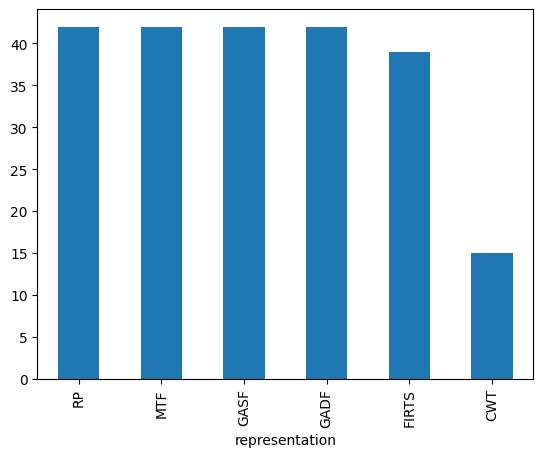

In [35]:
per_representation = missing_results_in_fine_datasets["representation"].value_counts()
per_representation.plot(kind="bar")

<Axes: xlabel='operation'>

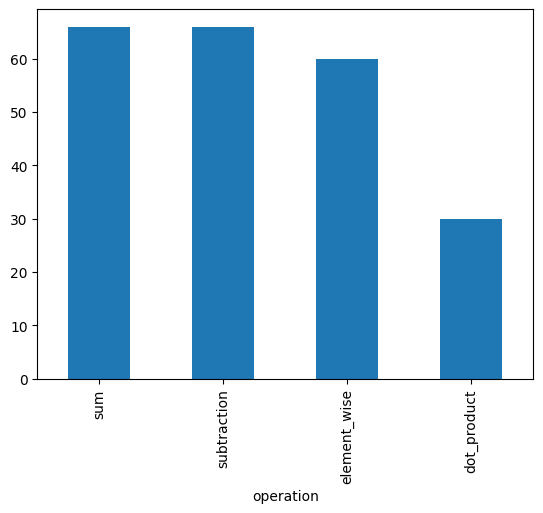

In [36]:
per_operation = missing_results_in_fine_datasets["operation"].value_counts()
per_operation.plot(kind="bar")

<Axes: xlabel='convolution_algorithm'>

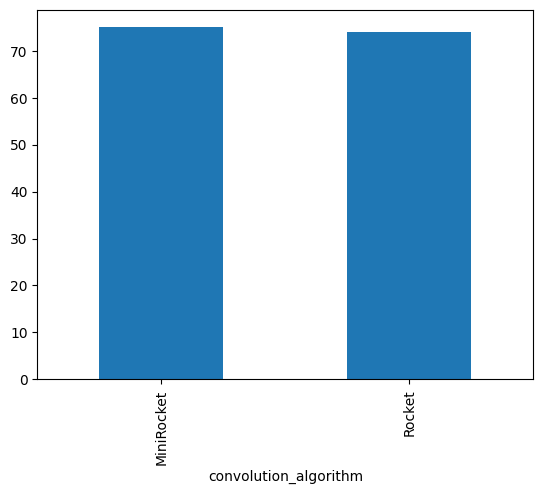

In [37]:
per_concolution_algorithm = missing_results_in_fine_datasets["convolution_algorithm"].value_counts()
per_concolution_algorithm.plot(kind="bar")